In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

import pickle
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.shape

(1338, 7)

In [9]:
lab_enc=LabelEncoder()

In [10]:
df2=lab_enc.fit_transform(df['sex'])

In [11]:
pd.Series(df2)

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Length: 1338, dtype: int32

In [12]:
df3 = lab_enc.fit_transform(df['smoker'])

In [13]:
pd.Series(df3)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Length: 1338, dtype: int32

In [14]:
df4 = lab_enc.fit_transform(df['region'])

In [15]:
pd.Series(df4)

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Length: 1338, dtype: int32

In [16]:
df['sex'] = df2
df['smoker'] = df3
df['region'] = df4
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [17]:
label_encoder = df
label_encoder

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [18]:
df['age'] = np.log(df['age'])
df['charges'] = np.log(df['charges'])
df['bmi'] = np.log(df['bmi'])

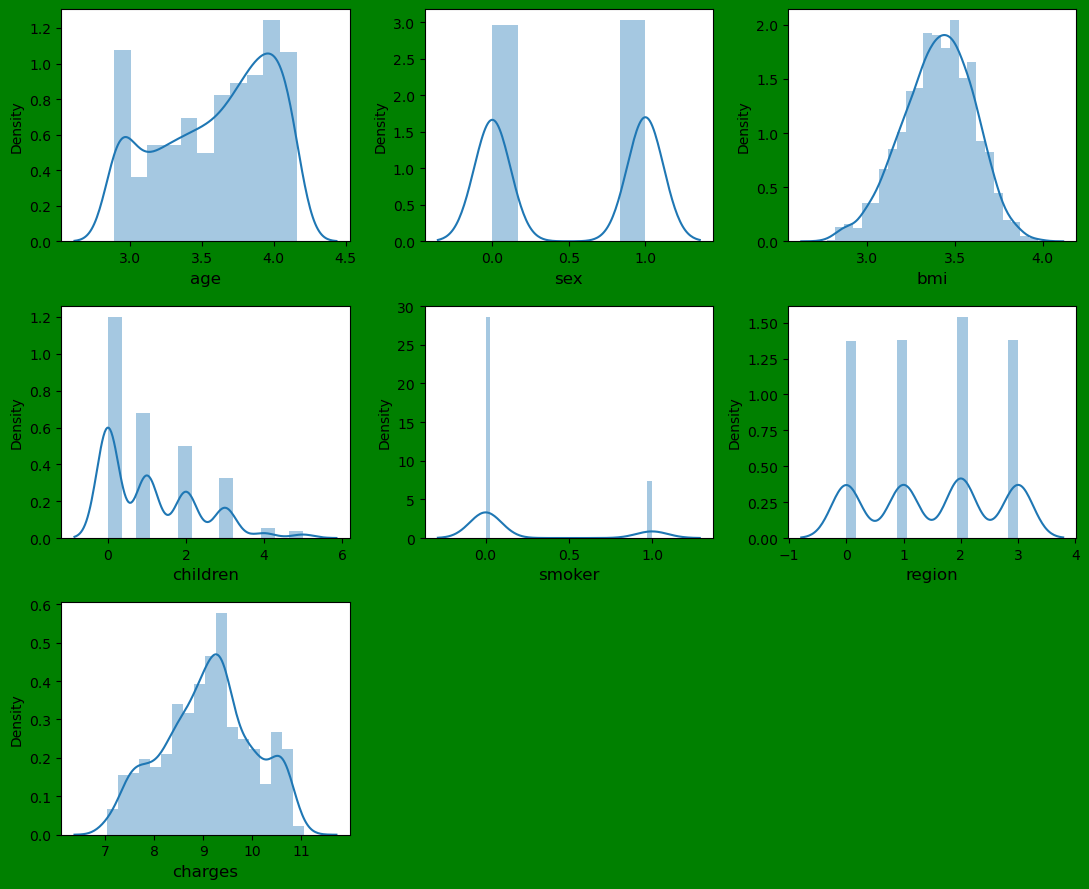

In [19]:
plt.figure(figsize=(11,9),facecolor='green')
plotnumber=1
for column in df:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)   ## Plots the graphs 3 rows and 3 columns at specified axis
        sns.distplot(df[column])    ## Plots a distribution plot of the data 
        plt.xlabel(column,fontsize=12)  
    plotnumber +=1     ## Increments or adds the graphs one by one
plt.tight_layout()

In [20]:
## We still do not meet the requirement hence we will try power transformation

In [21]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='box-cox')

In [22]:
features = ['age','charges','bmi']

In [23]:
df[features]=scaler.fit_transform(df[features].values)

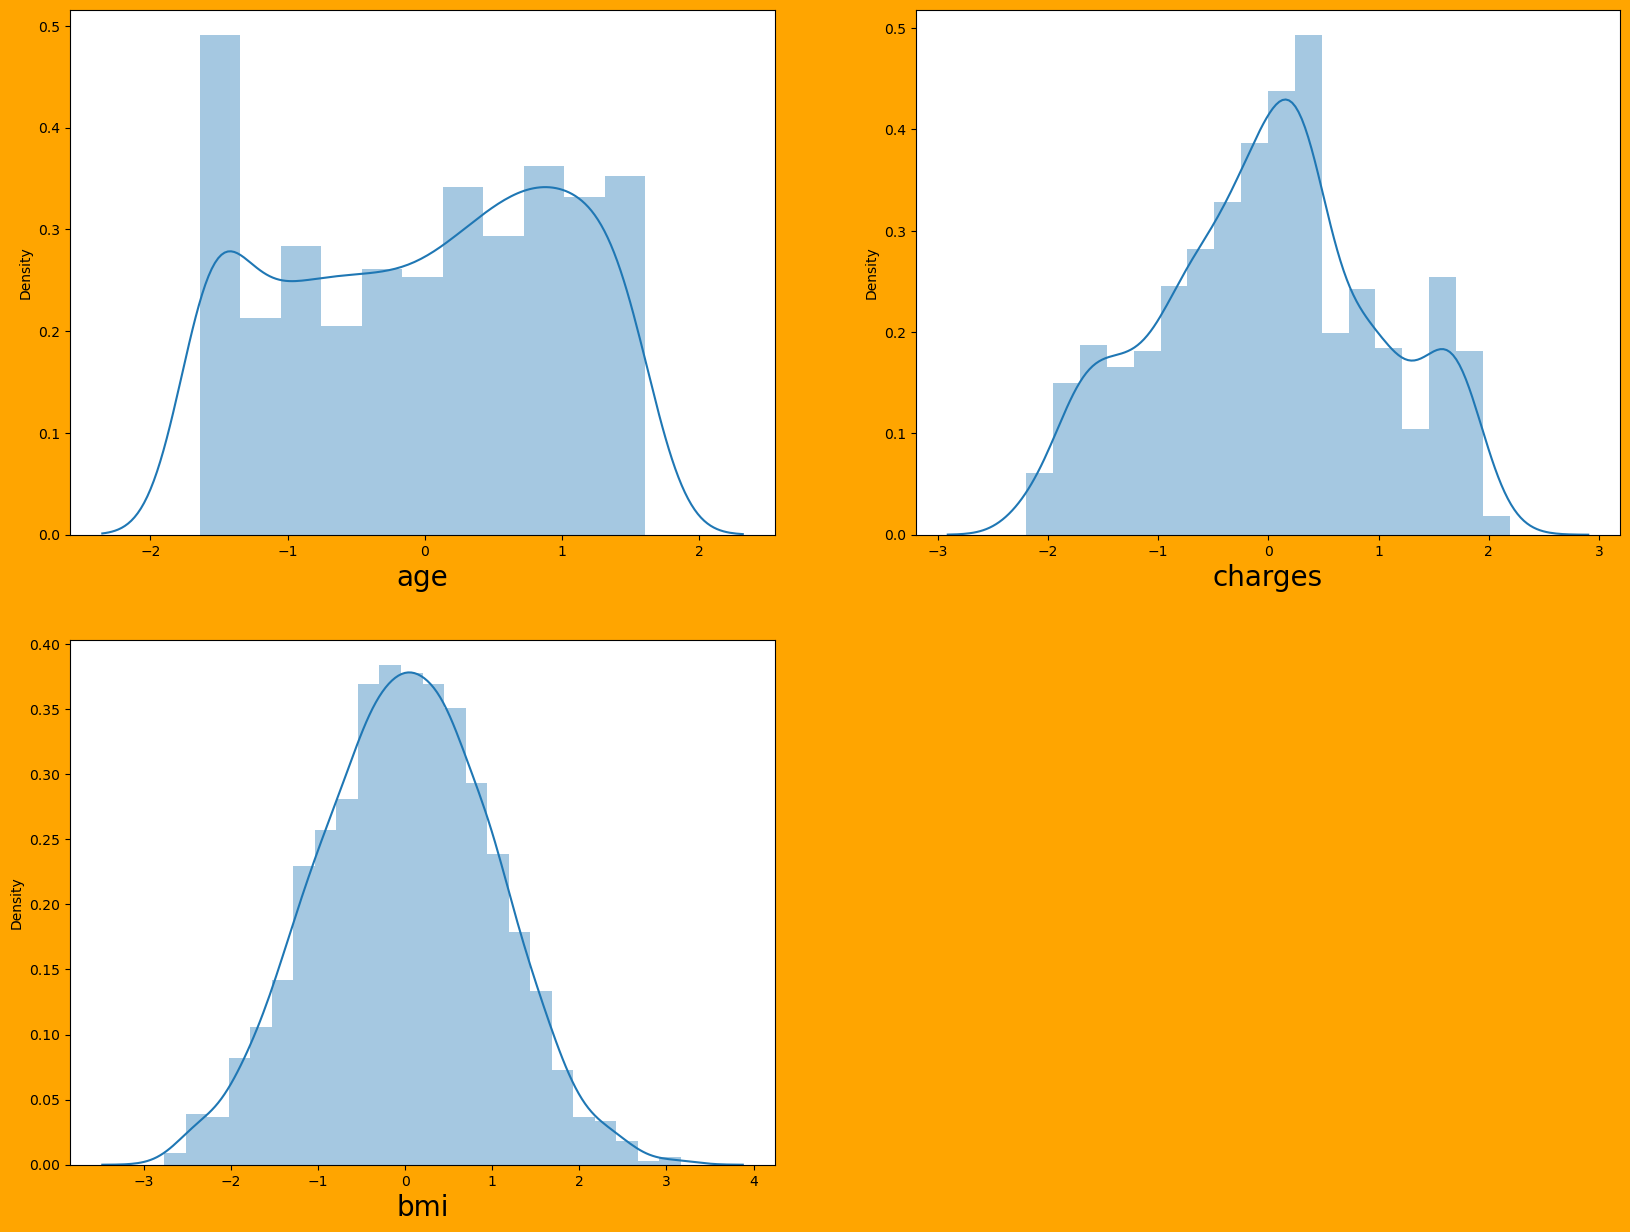

In [24]:
#Lets plot the Dist plot using plt.figure
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber = 1
for column in features:
    if plotnumber <=9:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [25]:
## This is the maximum transformation we can meet up with. 
## We used yeo-johnson technique to transform because we have positive as well as negative values

In [26]:
## Now we need to convert it into standard normal distribution

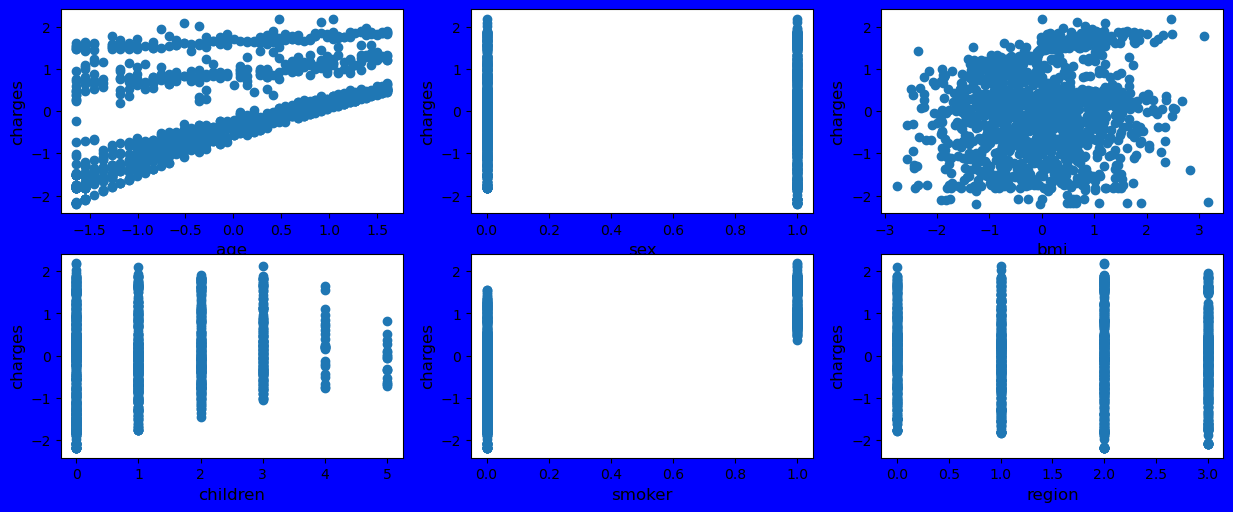

In [27]:
y=df['charges']             ## Assigning y as labels
x=df.drop(columns=['charges'])   ## By removing Label assigning remaning columns as features

plt.figure(figsize=(15,9),facecolor='blue')
plotnumber=1
for column in x:
    if plotnumber <=6:
        ax=plt.subplot(3,3,plotnumber)   ## Specifies the axis to the columns
        plt.scatter(x[column],y)         ## Plots the scatter plot
        plt.xlabel(column , fontsize=12)
        plt.ylabel('charges',fontsize=12)
    plotnumber +=1
plt.show()

In [28]:
scaler = StandardScaler()

In [29]:
x_scaler=scaler.fit_transform(x)

In [30]:
x_scaler

array([[-1.54439791, -1.0105187 , -0.4097097 , -0.90861367,  1.97058663,
         1.34390459],
       [-1.6399883 ,  0.98959079,  0.55076264, -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.75564915,  0.98959079,  0.43039384,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.6399883 , -1.0105187 ,  1.01722658, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.3584239 , -1.0105187 , -0.77996203, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.44073113, -1.0105187 , -0.20994418, -0.90861367,  1.97058663,
        -0.46691549]])

In [31]:
x_train,x_test,y_train,y_test =train_test_split(x_scaler,y,test_size=0.2,random_state=(42))

In [32]:
lm=LinearRegression()

In [33]:
lm.fit(x_train,y_train)

LinearRegression()

In [34]:
lm.score(x_train,y_train)

0.7610030633894628

In [35]:
lm.score(x_test,y_test)

0.8057066819554393

In [36]:
x_graph=lm.predict(x_test)

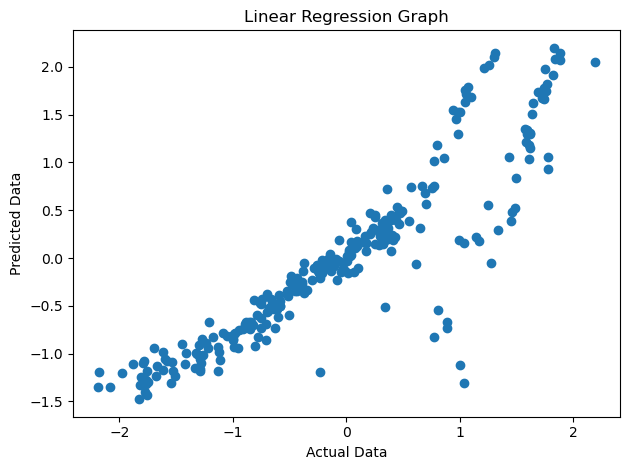

In [37]:
plt.scatter(y_test,x_graph)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [39]:
mean_absolute_error(y_test,x_graph)

0.300078468532378

In [40]:
mean_squared_error(y_test,x_graph)

0.20681729524361359

In [41]:
np.sqrt(mean_squared_error(y_test,x_graph))

0.45477169573711773

In [42]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [43]:
lasscv=LassoCV(alphas = None , max_iter =100)
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100)

In [44]:
alpha=lasscv.alpha_
alpha

0.0008743422515202285

In [46]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0008743422515202285)

In [47]:
lasso_reg.score(x_test,y_test)

0.8055713310133299

In [48]:
ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01))
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [49]:
ridgecv.alpha_

0.09099999999999998

In [50]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [51]:
ridge_model.score(x_test,y_test)

0.8057035187687595

## We have successfully build Linear Regression Model

## Now let us build  Decision Tree and Random Forest Regressor Model

## As our aim is to predict charges i.e a continuos/numerical values. Hence we need to use regression models
## We cannot use classification models as the outcome is not a categorical data

In [72]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [73]:
x_scaled.shape

(1338, 6)

In [74]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns

In [75]:
vif

,vif,Features
0,1.018093,age
1,1.008920,sex
2,1.041211,bmi
3,1.004924,children
4,1.006420,smoker
5,1.026319,region


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [110]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train) 

DecisionTreeRegressor()

In [111]:
model.score(x_train,y_train)

0.9946158079082607

In [112]:
model.score(x_test, y_test)

0.7771097323331316

In [113]:
x_graph=model.predict(x_test)

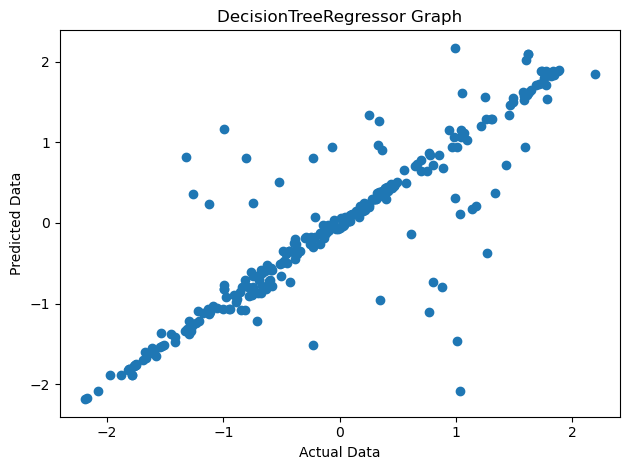

In [114]:
plt.scatter(y_test,x_graph)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('DecisionTreeRegressor Graph')
plt.tight_layout()

In [115]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [116]:
mean_absolute_error(y_test,x_graph)

0.20363708747292075

In [117]:
mean_squared_error(y_test,x_graph)

0.2372575792051398

In [118]:
np.sqrt(mean_squared_error(y_test,x_graph))

0.48709093525248426

In [123]:
from sklearn.ensemble import RandomForestRegressor
import pickle
model2 = RandomForestRegressor()
model2.fit(x_train, y_train) 

RandomForestRegressor()

In [124]:
model2.score(x_train,y_train)

0.9694192674804547

In [125]:
model2.score(x_test,y_test)

0.8478996904418554

In [126]:
x_graph=model2.predict(x_test)

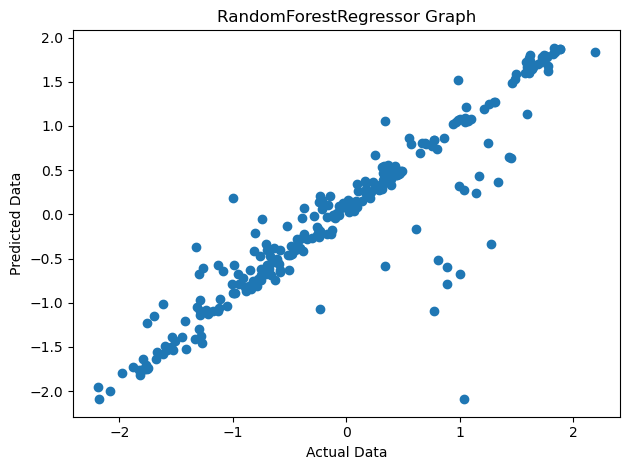

In [127]:
plt.scatter(y_test,x_graph)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('RandomForestRegressor Graph')
plt.tight_layout()

In [128]:
mean_absolute_error(y_test,x_graph)

0.20335560606668426

In [129]:
mean_squared_error(y_test,x_graph)

0.16190456236542952

In [130]:
np.sqrt(mean_squared_error(y_test,x_graph))

0.40237366012877823

## Now we need to load the model that using pickle

In [134]:
with open('random_forest_regressor.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

Model saved successfully.
